# Unsupervised Learning Capstone
### Application of Unsupervised Learning for Master Data Management

<b>Shafiq Jadallah    
Thinkful Data Science   
Nov X, 2019

# Agenda

## 1. Exploratory Data Analysis - get to know your data
## 2. Supervised Learning MLP - test drive
## 3. Unsupervised Learning - cluster *
## 4. Rebalaned Unsupervised Learning
## 5. Learnings and Next Steps

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
import datetime
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
#Import the dataset

audit_df=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/baler_pack_20191025.1545.csv')

audit_df.head().T

/Users/sjadallah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,14,19,20,21,31,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
id,01a0ce14-1dd6-4d29-ae77-3d5edae5dbc9,02383a7b-940c-48de-81c6-a272ef963ba7,09b432ce-d782-44bb-8b14-24d4eb2caa2e,0a4a7f3c-d5a7-4fe9-a0ad-6362848aa5d0,11c56265-3cba-422b-a50a-b7d1b1c0d428
device_id,fa4b355b-a235-477b-91e9-fdcc9c607d69,fa4b355b-a235-477b-91e9-fdcc9c607d69,fa4b355b-a235-477b-91e9-fdcc9c607d69,fa4b355b-a235-477b-91e9-fdcc9c607d69,fa4b355b-a235-477b-91e9-fdcc9c607d69
material_type,A,A,A,A,A
package_id,0,0,0,0,0
net_weight,0,0,0,0,0
unit,lb,lb,lb,lb,lb
package_date,2015-11-10 05:34:42,2015-11-10 05:34:42,2015-11-07 04:44:23,2015-11-06 19:12:03,2015-11-06 00:14:01
create_date,2015-11-10 05:46:17,2015-11-10 05:46:25,2015-11-12 19:34:51,2015-11-09 21:32:07,2015-11-06 00:14:31
employee_code,001,001,001,001,001
img_url,NaN,NaN,NaN,0a4a7f3c-d5a7-4fe9-a0ad-6362848aa5d0,11c56265-3cba-422b-a50a-b7d1b1c0d428


### Explore the dataset and clean up as necessary

In [3]:
audit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153096 entries, 0 to 153095
Data columns (total 38 columns):
id                                  153096 non-null object
device_id                           153096 non-null object
material_type                       153059 non-null object
package_id                          153096 non-null int64
net_weight                          153096 non-null float64
unit                                153096 non-null object
package_date                        153096 non-null object
create_date                         153096 non-null object
employee_code                       152930 non-null object
img_url                             143120 non-null object
ext_printed                         153061 non-null float64
barcode                             27172 non-null object
tare_weight                         45572 non-null float64
gross_weight                        139489 non-null float64
powo                                42 non-null object
audit_s

In [4]:
audit_df.groupby('audit_status').count()

,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
audit_status,,,,,,,,,,,,,,,,,,,,,
A,146030,146030,145993,146030,146030,146030,146030,146030,145869,137114,...,144548,145993,144548,64612,146030,146030,146030,146030,82951,0
C,878,878,878,878,878,878,878,878,878,854,...,878,878,878,836,878,878,878,878,878,0
R,6140,6140,6140,6140,6140,6140,6140,6140,6135,5120,...,5483,6140,5483,4601,6140,6140,6140,6140,6122,6140


In [5]:
#Convert the date related fields into date.time
audit_df['package_date'] = pd.to_datetime(audit_df['package_date'])
audit_df['create_date'] = pd.to_datetime(audit_df['create_date'])
audit_df['audit_date'] = pd.to_datetime(audit_df['audit_date'])

In [6]:
#Fill in all the NaN values with zero as we do not want to deprecate the data 

#define the columns to apply loop
names = ['audit_reject_reasonid', 'orig_material_type', 'orig_package_date', 'gross_weight',
        'orig_create_date', 'orig_tare_weight', 'orig_net_weight', 'reject_reason', 'img_url']

for name in names:
        audit_df['{}'.format(name)] = audit_df['{}'.format(name)].replace(np.nan, 0)
        
#Convert the reason codes into int
audit_df['audit_reject_reasonid']  = pd.to_numeric(audit_df['audit_reject_reasonid']).astype(int)

In [7]:
#Sort the dataframe by device id and package date

audit_df.sort_values(['device_id', 'package_date'], ascending = [False, True], inplace=True)

audit_df.head(15)

,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
68799,0393213d-1d81-4b32-83b6-2d09938adbb4,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,B,44,429.0,KG,2013-08-16 08:20:38,2018-07-27 15:33:27,Recibo,0393213d-1d81-4b32-83b6-2d09938adbb4,...,HEMM1004,B,PLAYO,BALED FILM,2013-08-16 08:20:38,44,A,Baler,HEMM1004,0
68802,dbfa2462-8811-4122-b71d-6f2e6932e072,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,A,45,457.0,KG,2013-08-17 02:25:15,2018-07-27 15:33:28,Recibo,dbfa2462-8811-4122-b71d-6f2e6932e072,...,HEMM1004,A,CARTON,BALED CARDBOARD,2013-08-17 02:25:15,45,A,Baler,HEMM1004,0
122,f3073433-bf28-44a7-99c4-56c524d31171,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,NaN,1,76.0,KG,2018-04-27 01:07:29,2018-04-26 12:07:30,0000,f3073433-bf28-44a7-99c4-56c524d31171,...,NaN,NaN,NaN,NaN,2018-04-27 01:07:29,1,A,Baler,HEMM1004,0
169,73a29c10-2ac2-42c0-ace7-e70d801d2b28,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,128.0,KG,2018-04-27 01:07:53,2018-04-26 12:07:54,Recibo,73a29c10-2ac2-42c0-ace7-e70d801d2b28,...,NaN,C,NaN,NaN,2018-04-27 01:07:53,2,A,Baler,HEMM1004,0
32,237ddc40-0d0f-4632-afb7-29705c124ef0,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,1,130.0,KG,2018-05-01 07:19:23,2018-04-30 18:19:25,Recibo,237ddc40-0d0f-4632-afb7-29705c124ef0,...,NaN,C,NaN,NaN,2018-05-01 07:19:23,1,A,Baler,HEMM1004,0
172,7b19285f-9065-4093-b323-02bfa715f67a,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,519.0,KG,2018-05-26 17:03:01,2018-05-26 17:03:05,Recibo,7b19285f-9065-4093-b323-02bfa715f67a,...,NaN,C,NaN,NaN,2018-05-26 17:03:01,2,A,Baler,HEMM1004,0
225,00370b1c-a218-427c-b567-3130509ad58d,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,3,117.0,KG,2018-05-26 17:03:55,2018-05-26 17:03:58,Recibo,00370b1c-a218-427c-b567-3130509ad58d,...,NaN,C,NaN,NaN,2018-05-26 17:03:55,3,A,Baler,HEMM1004,0
374,bc40129a-af6c-4fc0-8e44-11bf3e423d0d,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,4,462.0,KG,2018-05-27 18:53:38,2018-05-27 18:53:43,Recibo,bc40129a-af6c-4fc0-8e44-11bf3e423d0d,...,NaN,C,NaN,NaN,2018-05-27 18:53:38,4,A,Baler,HEMM1004,0
444,8608ee57-cd9c-4c6b-87b6-d5807ac07cb7,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,5,94.0,KG,2018-05-28 11:52:46,2018-05-28 11:52:51,Recibo,8608ee57-cd9c-4c6b-87b6-d5807ac07cb7,...,NaN,C,NaN,NaN,2018-05-28 11:52:46,5,A,Baler,HEMM1004,0
529,cf44d625-75aa-44f3-9827-8d17a2a95f89,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,6,138.0,KG,2018-05-28 13:56:31,2018-05-28 13:56:37,Recibo,cf44d625-75aa-44f3-9827-8d17a2a95f89,...,NaN,C,NaN,NaN,2018-05-28 13:56:31,6,A,Baler,HEMM1004,0


In [8]:
#Remove any data that was created prior to 2017 - this would not be valid data
audit_df.drop(audit_df[audit_df.package_date < '2017-01-01'].index, inplace=True)
audit_df.head()

,id,device_id,material_type,package_id,net_weight,unit,package_date,create_date,employee_code,img_url,...,DeviceCode,material_type.1,MaterialDescription_FromOriginal,MaterialClass_FromOriginal,package_date.1,package_id.1,audit_status.1,DeviceTypeFromSchema,DeviceCodeFromSchema,reject_reason
122,f3073433-bf28-44a7-99c4-56c524d31171,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,NaN,1,76.0,KG,2018-04-27 01:07:29,2018-04-26 12:07:30,0000,f3073433-bf28-44a7-99c4-56c524d31171,...,NaN,NaN,NaN,NaN,2018-04-27 01:07:29,1,A,Baler,HEMM1004,0
169,73a29c10-2ac2-42c0-ace7-e70d801d2b28,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,128.0,KG,2018-04-27 01:07:53,2018-04-26 12:07:54,Recibo,73a29c10-2ac2-42c0-ace7-e70d801d2b28,...,NaN,C,NaN,NaN,2018-04-27 01:07:53,2,A,Baler,HEMM1004,0
32,237ddc40-0d0f-4632-afb7-29705c124ef0,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,1,130.0,KG,2018-05-01 07:19:23,2018-04-30 18:19:25,Recibo,237ddc40-0d0f-4632-afb7-29705c124ef0,...,NaN,C,NaN,NaN,2018-05-01 07:19:23,1,A,Baler,HEMM1004,0
172,7b19285f-9065-4093-b323-02bfa715f67a,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,2,519.0,KG,2018-05-26 17:03:01,2018-05-26 17:03:05,Recibo,7b19285f-9065-4093-b323-02bfa715f67a,...,NaN,C,NaN,NaN,2018-05-26 17:03:01,2,A,Baler,HEMM1004,0
225,00370b1c-a218-427c-b567-3130509ad58d,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,C,3,117.0,KG,2018-05-26 17:03:55,2018-05-26 17:03:58,Recibo,00370b1c-a218-427c-b567-3130509ad58d,...,NaN,C,NaN,NaN,2018-05-26 17:03:55,3,A,Baler,HEMM1004,0


In [9]:
#Create new feature: time interval between package dates for each unique device_id to determine 'event'

#Will use a function; so first need to define the funtion
def diff_func(df):
    return df.diff().dt.total_seconds()/60

#Now call the function using .apply
audit_df['time_delta'] = audit_df.groupby('device_id')['package_date'].apply(diff_func)

#Fill in any NaN values
audit_df['time_delta'].fillna('0', inplace=True)

#Convert the output into a float
audit_df['time_delta'] = pd.to_numeric(audit_df['time_delta']).astype(float)

In [10]:
round(audit_df.describe(),2)

,package_id,net_weight,ext_printed,tare_weight,gross_weight,audit_reject_reasonid,orig_tare_weight,orig_net_weight,package_id.1,time_delta
count,118310.00,118310.00,118310.00,45062.00,118310.00,118310.00,118310.0,118310.00,118310.00,118310.00
mean,4626.18,33388.31,0.03,0.00,24017.14,0.24,0.0,2.18,4626.18,633.58
std,8356.12,803882.80,0.31,0.13,686817.39,1.10,0.0,32.13,8356.12,3832.71
min,1.00,-131.00,0.00,0.00,-131.00,0.00,0.0,0.00,1.00,0.00
25%,221.00,387.00,0.00,0.00,0.00,0.00,0.0,0.00,221.00,4.73
50%,635.00,441.00,0.00,0.00,0.00,0.00,0.0,0.00,635.00,162.36
75%,2952.00,967.00,0.00,0.00,0.00,0.00,0.0,0.00,2952.00,781.25
max,32545.00,19767300.00,40.00,5.00,19767300.00,7.00,0.0,1211.00,32545.00,382238.60


In [11]:
#Drop all the columns that we won't need for the classification model

audit_df=audit_df.drop(['tare_weight', 'powo', 'img_url.1', 'device_id.1','material_type.1',
                        'DeviceCodeFromSchema', 'MaterialClass_FromOriginal'], axis=1)

In [12]:
audit_df['device_id'].nunique()

147

In [13]:
audit_df['img_url'].unique()

array(['f3073433-bf28-44a7-99c4-56c524d31171',
       '73a29c10-2ac2-42c0-ace7-e70d801d2b28',
       '237ddc40-0d0f-4632-afb7-29705c124ef0', ...,
       'c41c9b69-b830-4f71-aab2-57d771ebcc65',
       '82339a3e-5344-43fe-ad26-fbe7f1727160',
       '35fe19b1-9679-4685-b2dd-d223f43f628c'], dtype=object)

In [14]:
audit_df['MaterialDescription_FromOriginal'].unique()

array([nan, 'CARTON', 'PLAYO', 'OCC', '.', 'CARDBOARD', 'OTHER', 'FILM',
       'PLASTICSTRAP', 'ALUMINUM', 'LLD FILM', 'TEST', 'B', 'FILM A',
       'PPH', 'PET STRAPPING', 'mixto', 'OCC-BULK', 'LLDPE-BULK',
       'OCC-SMALL BALE', 'BOMA', 'Default', 'SHRINK WRAP', 'WASTE', 'cc',
       'STF', 'EPSB', 'PRODUCTO TERMINADO', 'BASURA', 'CARTON REPROCESO',
       'MIXTO REPROCESO', 'FLX PUR 21620', 'WDFOAM 21097',
       'FLX PUR RES-N 21097', 'FEHRER 21294', 'CARPET PAD', 'PLMX',
       'REPLAS', 'PET', 'pap-11a0-123456789', 'EPS FOAM', 'METAL',
       'OTHER PLASTIC', 'MILK BOTTLE', 'EPS', 'HDP', 'IGLOO', 'ANHEUSER',
       'HDP -FILM', 'LDP-FL-SFNA-AVU01'], dtype=object)

In [15]:
#Redefine MaterialDescription to create fewer categories

def material_class(material):
    if material == 'CARTON':
        return '1'
    elif material == 'OCC':
        return '1'
    elif material == 'pap-11a0-123456789':
        return '1'
    elif material == 'CARTON REPROCESO':
        return '1'
    elif material == 'OCC-BULK':
        return '1'
    elif material == 'OCC-SMALL BALE':
        return '1'
    elif material == 'OCC':
        return '1'
    elif material == 'PLAYO':
        return '2'
    elif material == 'FILM A':
        return '2'
    elif material == 'LDP-FL-SFNA-AVU01':
        return '2'
    elif material == 'LLD FILM':
        return '2'
    elif material == 'PLMX':
        return '2'
    elif material == 'SHRINK WRAP':
        return '2'
    elif material == 'BOMA':
        return '2'
    elif material == 'LLDPE-BULK':
        return '2'
    elif material == 'EPS':
        return '3'
    elif material == 'EPS FOAM':
        return '3'
    elif material == 'EPSB':
        return '3'
    elif material == 'PET':
        return '4'
    elif material == 'PET STRAPPING':
        return '4'
    elif material == 'STF':
        return '4'
    elif material == 'METAL':
        return '5'
    elif material == 'ALUMINUM':
        return '5'
    elif material == 'HDP':
        return '6'
    elif material == 'MILK BOTTLE':
        return '6'
    elif material == 'HDP-RG':
        return '6'
    elif material == 'HDP - FILM':
        return '6'
    elif material == 'IGLOO':
        return '6'    
    else:
        return '7'
    
#use .apply() method by calling the function above.
audit_df['Material'] = audit_df['MaterialDescription_FromOriginal'].apply(material_class)

#Convert the caterogies into int
audit_df['Material']  = pd.to_numeric(audit_df['Material']).astype(int)

print(audit_df.groupby('Material')['Material'].count())

Material
1    57390
2    10029
3      742
4      316
5       94
6     1540
7    48199
Name: Material, dtype: int64


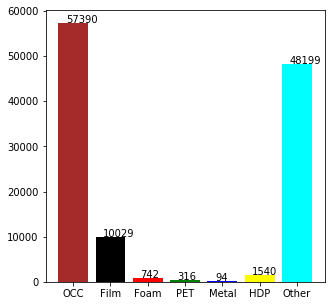

In [16]:
#Plot a histogram of the materials
plt.figure(figsize=(5,5))
material = audit_df.groupby('Material')['Material'].count()
bars = ['OCC', 'Film', 'Foam', 'PET', 'Metal', 'HDP', 'Other']
y_pos = np.arange(len(bars))

plt.bar(bars, material, color=(['brown','black', 'red', 'green', 'blue', 'yellow', 'cyan']))
plt.xticks(y_pos, bars)
# Add some labels.
for i, v in enumerate(material):
     plt.text(y_pos[i] - 0.20, v + 0.15, str(v))   
plt.show()

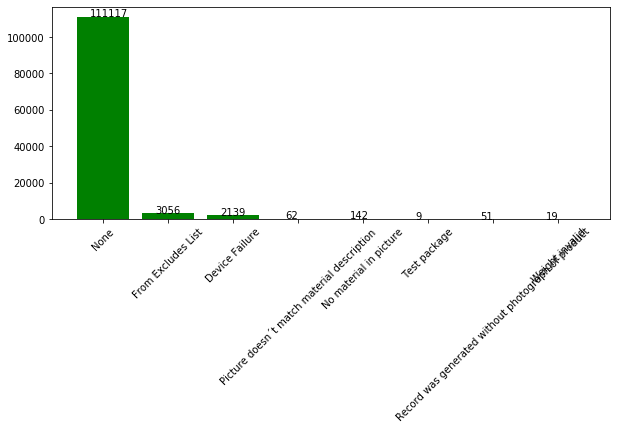

In [71]:
#Plot a histogram of the audit reject reasons
plt.figure(figsize=(10,5))
reasons = audit_df.groupby(['reject_reason','audit_reject_reasonid'])['device_id'].count()
bars = ['None', 'From Excludes List', 'Device Failure', 'Picture doesn´t match material description',
       'No material in picture', 'Test package','Record was generated without photograph of product', 'Weight invalid']
y_pos = np.arange(len(bars))
plt.bar(bars, reasons, color='g')
plt.xticks(y_pos, bars)
plt.xticks(y_pos, bars, rotation=45) 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
# Add some labels.
for i, v in enumerate(reasons):
     plt.text(y_pos[i] - 0.20, v + 0.15, str(v))   
plt.show()

In [18]:
#First need to fill in the missing values
audit_df['barcode'].fillna(value=0, inplace=True)

In [19]:
#Create dummy variables for barcode category
def label_present(label):
    if label == 0:
        return 0
    else:
        return 1
    
#use .apply() method by calling the function
audit_df['label'] = audit_df['barcode'].apply(label_present)

#Convert the caterogy into int
audit_df['label']  = pd.to_numeric(audit_df['label']).astype(int)

print(audit_df.groupby('label')['label'].count())

label
0    91138
1    27172
Name: label, dtype: int64


In [20]:
#Create numerical categories for audit status: accept, reject or change

def audited(audit):
    if audit == 'A':
        return 1
    elif audit == 'R':
        return 2
    else:
        return 3
    
#use .apply() method to call the function
audit_df['audited'] = audit_df['audit_status'].apply(audited)

print(audit_df.groupby('audited')['audited'].count())


audited
1    111244
2      6140
3       926
Name: audited, dtype: int64


In [21]:
#Create dummy variables for img_url

def image_present(image):
    if image == 0:
        return 0
    else:
        return 1
    
#use .apply() method by calling the function
audit_df['image'] = audit_df['img_url'].apply(image_present)

print(audit_df.groupby('image')['image'].count())

image
0      6460
1    111850
Name: image, dtype: int64


In [22]:
audit_df.groupby(['reject_reason','audit_reject_reasonid'])['device_id'].count().reset_index()

,reject_reason,audit_reject_reasonid,device_id
0,0,0,112170
1,Device Failure,3,3536
2,From Excludes List,7,2145
3,No material in picture,2,63
4,Picture doesn´t match material description,5,142
5,Record was generated without photograph of pro...,1,9
6,Test package,6,226
7,Weight invalid,4,19


In [23]:
#Drop any remainging nan values and write dataset to a new file for modeling
audit_df.dropna(inplace=True)

audit_df.to_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/audit_clean_dataset.csv')

In [24]:
# #Pair plot to quickly visualize the relationship among the audited records and the reasons
# #df.drop(df[df.score < 50].index, inplace=True)
# import seaborn as sns

# #First create the dataframe for visualizing
# pairplot_df = audit_df[audit_df['audit_reject_reasonid'] != 0]

# #Now visualize

# sns.set(style="ticks")
# sns.pairplot(pairplot_df, hue="audit_reject_reasonid")

In [25]:
audit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116595 entries, 68780 to 153095
Data columns (total 36 columns):
id                                  116595 non-null object
device_id                           116595 non-null object
material_type                       116595 non-null object
package_id                          116595 non-null int64
net_weight                          116595 non-null float64
unit                                116595 non-null object
package_date                        116595 non-null datetime64[ns]
create_date                         116595 non-null datetime64[ns]
employee_code                       116595 non-null object
img_url                             116595 non-null object
ext_printed                         116595 non-null float64
barcode                             116595 non-null object
gross_weight                        116595 non-null float64
audit_status                        116595 non-null object
audit_userid                        11659

In [26]:
audit_df.isnull().sum()/audit_df.isnull().count()

id                                  0.0
device_id                           0.0
material_type                       0.0
package_id                          0.0
net_weight                          0.0
unit                                0.0
package_date                        0.0
create_date                         0.0
employee_code                       0.0
img_url                             0.0
ext_printed                         0.0
barcode                             0.0
gross_weight                        0.0
audit_status                        0.0
audit_userid                        0.0
audit_date                          0.0
audit_reject_reasonid               0.0
orig_material_type                  0.0
orig_package_date                   0.0
orig_create_date                    0.0
orig_tare_weight                    0.0
orig_net_weight                     0.0
DeviceType                          0.0
DevicePackageID                     0.0
DeviceCode                          0.0


### The Final Dataframe for modeling

In [67]:
round(audit_df.describe(), 1).T

,count,mean,std,min,25%,50%,75%,max
package_id,116595.0,4692.8,8398.5,1.0,233.0,653.0,3094.0,32545.0
net_weight,116595.0,25907.2,706172.8,-131.0,390.0,442.0,979.0,19767300.0
ext_printed,116595.0,0.0,0.3,0.0,0.0,0.0,0.0,40.0
gross_weight,116595.0,16400.6,566974.5,-131.0,0.0,0.0,0.0,19767300.0
audit_reject_reasonid,116595.0,0.2,1.1,0.0,0.0,0.0,0.0,7.0
orig_tare_weight,116595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orig_net_weight,116595.0,2.2,32.4,0.0,0.0,0.0,0.0,1211.0
package_id.1,116595.0,4692.8,8398.5,1.0,233.0,653.0,3094.0,32545.0
time_delta,116595.0,593.8,2857.5,0.0,5.1,166.1,785.6,352540.6
Material,116595.0,3.6,2.9,1.0,1.0,2.0,7.0,7.0


In [68]:
round(audit_df.groupby('audit_status').mean(), 1).T

audit_status,A,C,R
package_id,4937.5,595.6,424.6
net_weight,1125.6,369.6,528705.4
ext_printed,0.0,0.0,0.0
gross_weight,102.9,117.6,346984.9
audit_reject_reasonid,0.0,0.0,4.6
orig_tare_weight,0.0,0.0,0.0
orig_net_weight,0.0,294.3,0.0
package_id.1,4937.5,595.6,424.6
time_delta,601.5,743.3,415.4
Material,3.6,1.8,2.4


In [29]:
#Import the dataset

audit=pd.read_csv('/Users/sjadallah/Dropbox/Thinkful_data/Unsupervised Learning/audit_clean_dataset.csv')

### Supervised Learning: An MLP model

In [30]:
#Now it's time to build some models

# Import the model.
from sklearn.neural_network import MLPClassifier

#Define the X and Y variables
X = audit[['package_id', 'orig_net_weight', 'ext_printed', 
           'gross_weight','Material', 'image', 
           'audit_reject_reasonid', 'label', 'time_delta']]

y = audit['audit_status']

In [31]:
# Establish and fit the model, with a single, 100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,4))
mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
#Meaure the model's performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

print('MLP Initial Model Score:', round(mlp.score(X, y),4))
print('Initial MLP Model cross validation score:', cross_val_score(mlp, X, y, cv=5))

MLP Initial Model Score: 0.9955
Initial MLP Model cross validation score: [0.99455403 0.99734134 0.9920669  0.94553564 0.95235236]


In [33]:
#Import train/test/split
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels


MLP_X_train, MLP_X_test, mlp_y_train, mlp_y_test = train_test_split(X, y, test_size=.3, stratify=y)

#Fit the model
mlp_test = MLPClassifier(hidden_layer_sizes=(100,4))
mlp_test.fit(MLP_X_train, mlp_y_train)

#Now use the model to predict
mlp_pred = mlp.predict(MLP_X_test)

print('MLP Training dataset score:', round(mlp_test.score(MLP_X_test, mlp_y_test),4))
print('MLP Model predicted scores on trained data:', cross_val_score(mlp_test, MLP_X_test, mlp_y_test, cv=5))

MLP Training dataset score: 0.9895
MLP Model predicted scores on trained data: [0.9914249  0.95126483 0.95711835 0.9529664  0.99370889]


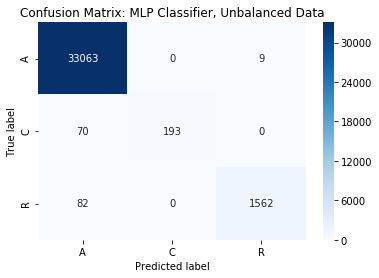

In [70]:
# Plot the solution using a heatmap/confusion matrix
labels = unique_labels(audit['audit_status'])
cm = confusion_matrix(mlp_y_test, mlp_pred, labels)
#Transform confusion matrix into dataframe for visualizing
cm_df = pd.DataFrame(cm,
                     index = ['A', 'C', 'R'], 
                     columns = ['A','C','R'])
ax = sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: MLP Classifier, Unbalanced Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Supervised Learning Model K-Means: Labeled Output (Y)

In [35]:
#Define dataset for clustering
km_df = audit[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']
]


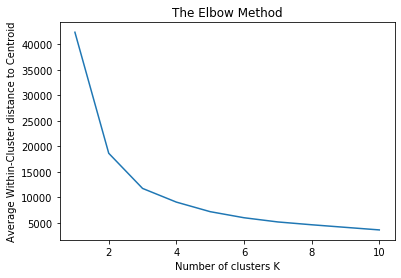

In [72]:
#Define dataset for clustering
KM_X = audit[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image']]
y = audit['audit_status']
# Normalize the data because of the variance in the features
KM_X_norm = normalize(KM_X)
# Using the elbow method to find  the optimal number of clusters
ks = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
  kmeans.fit(KM_X_norm)
  ks.append(kmeans.inertia_)
plt.plot(range(1, 11),ks)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid')  
plt.show()

In [37]:
# Calculate predicted values.
kmu6_y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(KM_X_norm)
# Check the solution against the data.
print('Comparing k-means 6_clusters against the data:')
print(round(pd.crosstab(kmu6_y_pred, y, normalize = 'index'),4))
# Calculate predicted values.
kmu3_y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(KM_X_norm)
# Check the solution against the data.
print('Comparing k-means 3_clusters against the data:')
print(round(pd.crosstab(kmu3_y_pred, y, normalize = 'index'),4))

Comparing k-means 6_clusters against the data:
audit_status       A       C       R
row_0                               
0             0.9614  0.0034  0.0352
1             0.9698  0.0089  0.0213
2             0.9428  0.0131  0.0441
3             0.8914  0.0082  0.1003
4             0.9730  0.0105  0.0165
5             0.8629  0.0060  0.1312
Comparing k-means 3_clusters against the data:
audit_status       A       C       R
row_0                               
0             0.8841  0.0081  0.1078
1             0.9572  0.0064  0.0364
2             0.9714  0.0090  0.0196


### Unsupervised Model: K-Means with No Labeled Output

In [73]:
#Measure time performance
kmu_start = time.time()

#Define dataset for clustering
KMu_X = km_df[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']]
# Normalize the data because of the variance in the features
KMu_X_norm = normalize(KMu_X)
# Reduce it to two components.
KMu_X_pca = PCA(2).fit_transform(KMu_X_norm)

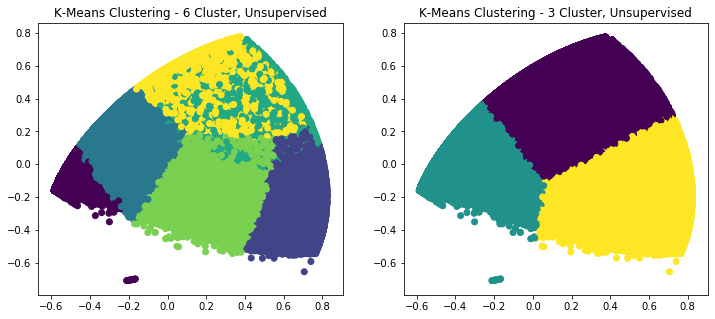

Processing time: 18.5765 seconds


In [74]:
#Plot the solutions.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(KMu_X_pca[:, 0], KMu_X_pca[:, 1], c=kmu6_y_pred)
plt.title('K-Means Clustering - 6 Cluster, Unsupervised')
plt.savefig('k_means_nolabels_6clusters_imbalanced.png')
plt.subplot(1,2,2)
plt.scatter(KMu_X_pca[:, 0], KMu_X_pca[:, 1], c=kmu3_y_pred)
plt.title('K-Means Clustering - 3 Cluster, Unsupervised')
plt.savefig('k_means_nolabels_3clusters_imbalanced.png')
plt.show()
print("Processing time: %s seconds" % round((time.time() - kmu_start), 4))

### Unsupervised Model: Mean Shift with No Labeled Output

In [78]:
#Measure time performance
mshift_start = time.time()

#Define dataset for clustering
Mshift_X = km_df[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']]
mshift_y = km_df['audited']
# Normalize the data because of the variance in the features
Mshift_X_norm = normalize(Mshift_X)
# Reduce it to two components.
Mshift_X_pca = PCA(2).fit_transform(Mshift_X_norm)
#Divide into training and test sets.
MS_X_train, MS_X_test, ms_y_train, ms_y_test = train_test_split(
    Mshift_X_pca,
    mshift_y,
    test_size=0.8,
    random_state=42)
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(MS_X_train, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(MS_X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
# Count our clusters.
n_clusters_ = len(np.unique(labels))

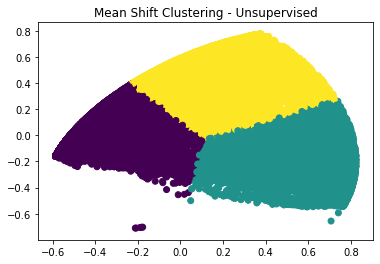

Number of estimated clusters: 3
Processing time: 5.9726 seconds


In [77]:
#Plot the solution.
plt.scatter(MS_X_train[:,0], MS_X_train[:,1], c=labels)
plt.title('Mean Shift Clustering - Unsupervised')
plt.savefig('mean-shift_labeled_imbalanced.png')
plt.show()

print("Number of estimated clusters: {}".format(n_clusters_))
print("Processing time: %s seconds" % round((time.time() - mshift_start), 4))

After running the data through several different iterations of K-Means and an MLP classifier, the results indicate that the data may be imbalanced.  The last test applied a random undersampler to test if such was the case and the last graph shows an improvement in the clustering after undersampling occurred.  Let's look at how the data 'could' be clustered using a more balanced dataset.  

# Over and Under -Sampling Using IMBalance
### SMOTEENN & SMOTETomek 

 - Original Data set had 116K records, of which 94% were all one class.  
 - Randomly undersampled using the minority groups (6%) but lost too much data (868 data points)
 - Applying the under/over technique increased dataset size to 18K records. 

In [40]:
#import the function 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.svm import LinearSVC

#define the parameters for
smote_enn = SMOTEENN(random_state=0)
smote_tomek = SMOTETomek(random_state=0)

#fit the sampling models
SMX_resampled, smy_resampled = smote_enn.fit_resample(MLP_X_train, mlp_y_train)
print('SMOTEENN dataset:',sorted(Counter(smy_resampled).items()))

SMTX_resampled, smty_resampled = smote_tomek.fit_resample(MLP_X_train, mlp_y_train)
print('SMOTETomek dataset:',sorted(Counter(smy_resampled).items()))


SMOTEENN dataset: [('A', 65266), ('C', 74330), ('R', 72114)]
SMOTETomek dataset: [('A', 65266), ('C', 74330), ('R', 72114)]


In [41]:
#define the function for sampling data for the plot
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [42]:
#define the decision function for setting the grid boundaries
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

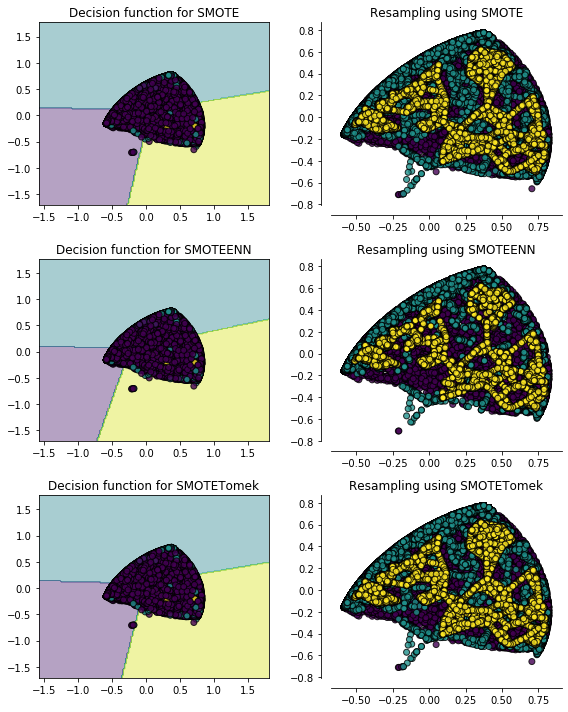

In [81]:
#Plot the comparisions between the linear SVC function on imbalanced data and clusting on balanced data
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8, 10))
ax_arr = ((ax1, ax2), (ax3, ax4), (ax5, ax6))
for ax, sampler in zip(ax_arr, (
        SMOTE(random_state=0),
        SMOTEENN(random_state=0),
        SMOTETomek(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(MS_X_train, ms_y_train)
    plot_decision_function(MS_X_train, ms_y_train, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(MS_X_train, ms_y_train, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()
plt.show()

### Supervised Learning: MLP model with Balanced Data

In [44]:
mlp_res_b_start = time.time()

#Establish and fit the model with a 4 layer, 1000 perceptron layer.
mlp_res_b = MLPClassifier(hidden_layer_sizes=(100,4))
mlp_res_b.fit(SMTX_resampled, smty_resampled)

#Create training and test datasets
MLP_RES_X_train, MLP_RES_X_test, mlp_res_y_train, mlp_res_y_test = train_test_split(
    SMTX_resampled, 
    smty_resampled, 
    test_size=.8, 
    random_state=42)

#Now use the model to predict
mlp_res_b_train_pred = mlp_res_b.predict(MLP_RES_X_train)
mlp_res_b_test_pred = mlp_res_b.predict(MLP_RES_X_test)


print("Processing time: %s seconds" % round((time.time() - mlp_res_b_start), 4))

# #Measure the model's performance
# print('MLP Model Score_Balanced Data:', round(mlp_res_b.score(X_resampled, y_resampled),4))
# print('MLP Model Cross Validation Score_Balanced Data:', cross_val_score(mlp_res_b, X_resampled, y_resampled, cv=5))
# print("Processing time: %s seconds" % round((time.time() - mlp_res_b_start), 4))

Processing time: 14.0113 seconds


In [45]:
#Measure the model's performance
from sklearn.metrics import accuracy_score

print('MLP Model Train Set Score_Balanced Data:', 
      round(accuracy_score(mlp_res_y_train, mlp_res_b_train_pred),4))
print('MLP Model Test Set Score_Balanced Data:', 
      round(accuracy_score(mlp_res_y_test, mlp_res_b_test_pred),4))
print('MLP Model Cross Validation Score_Balanced Data:', 
      cross_val_score(mlp_res_b, SMTX_resampled, smty_resampled, cv=5))


MLP Model Train Set Score_Balanced Data: 0.9451
MLP Model Test Set Score_Balanced Data: 0.9461
MLP Model Cross Validation Score_Balanced Data: [0.9294151  0.96395433 0.9642592  0.96604878 0.94165939]


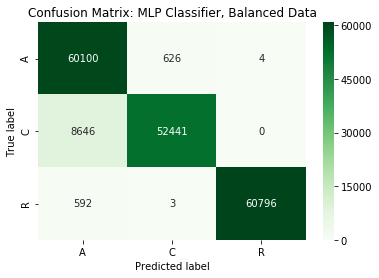

In [46]:
# Plot a confusion matrix to visualize the output
labels = unique_labels(audit['audit_status'])
cm_mlpb = confusion_matrix(mlp_res_y_test, mlp_res_b_test_pred, labels)
#Transform confusion matrix into dataframe for visualizing
cm_mlpb_df = pd.DataFrame(cm_mlpb,
                     index = ['A', 'C', 'R'], 
                     columns = ['A','C','R'])
ax = sns.heatmap(cm_mlpb_df, annot=True, fmt='g', cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: MLP Classifier, Balanced Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix for the balanced data reflects a very different result than with the unbalanced data.  There has been an increase in FP and FN and more miss-classifications than with the previous model.  

### Unsupervised K Means Model: No Labeled Output with Balanced Data

In [83]:
#Measure time performance
kmb_start = time.time()

#Define dataset for clustering
KMUB_X = km_df[['package_id', 'net_weight', 'ext_printed', 'gross_weight',
               'audit_reject_reasonid', 'orig_tare_weight', 'orig_net_weight',
               'time_delta', 'Material', 'label', 'image', 'audited']]
kmub_y = km_df['audited']
# Run SMOTETomek random over/under sampler to balance the data among the minority set
KM_SMTX_resampled, km_smty_resampled = smote_tomek.fit_resample(KMUB_X, kmub_y)
print('SMOTETomek K-Means dataset:',sorted(Counter(km_smty_resampled).items()))
# Normalize the data because of the variance in the features
KMB_X_norm = normalize(KM_SMTX_resampled)
# Reduce it to two components.
KMB_X_pca = PCA(2).fit_transform(KMB_X_norm)
# Cluster using 6 clusters.
kmb6_y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(KMB_X_norm)
# Cluster using 3 clusters..
kmb3_y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(KMB_X_norm)
print("Processing time: %s seconds" % round((time.time() - kmb_start), 4))

SMOTETomek K-Means dataset: [(1, 109370), (2, 109485), (3, 110122)]
Processing time: 58.1952 seconds


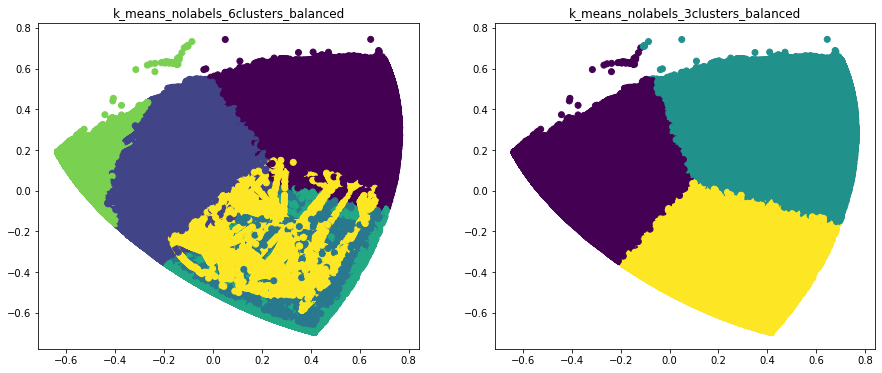

Processing time: 2689.2507 seconds


In [82]:
#Plot the solution.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(KMB_X_pca[:, 0], KMB_X_pca[:,1], c=kmb6_y_pred)
plt.title('k_means_nolabels_6clusters_balanced')
plt.savefig('k_means_nolabels_6clusters_balanced.png')

plt.subplot(1,2,2)
plt.scatter(KMB_X_pca[:, 0], KMB_X_pca[:,1], c=kmb3_y_pred)
plt.title('k_means_nolabels_3clusters_balanced')
plt.savefig('k_means_nolabels_3clusters_balanced.png')
plt.show()
print("Processing time: %s seconds" % round((time.time() - kmb_start), 4))

### Unsupervised Mean Shift Model: No Labeled Output with Balanced Data

In [48]:
#Measure time performance
mshiftb_start = time.time()

#Divide into training and test sets.
MS_B_X_train, MS_B_X_test, ms_b_y_train, ms_b_y_test = train_test_split(
    KM_SMTX_resampled, 
    km_smty_resampled,
    test_size=.5, 
    random_state=42)

# Normalize the data because of the variance in the features
Mshift_b_X_norm = normalize(MS_B_X_train)

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(Mshift_b_X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms_b = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_b.fit(Mshift_b_X_norm)

# Extract cluster assignments for each data point.
mslabels = ms.labels_

# Coordinates of the cluster centers.
msb_cluster_centers = ms.cluster_centers_

# Count our clusters.
msb_n_clusters_ = len(np.unique(mslabels))

# Reduce it to two components.
#Mshiftb_X_pca = PCA(2).fit_transform(Mshift_b_X_norm)

print("Number of estimated clusters: {}".format(msb_n_clusters_))
print("Processing time: %s seconds" % round((time.time() - mshiftb_start), 4))

Number of estimated clusters: 3
Processing time: 13.1911 seconds


In [49]:
print('train;', MS_B_X_train.shape)
print('labels', mslabels.shape)
print('test;', ms_b_y_test.shape)
print('norm;', Mshift_b_X_norm.shape)
print('norm;', msb_cluster_centers.shape)



#msb_labels.shape

train; (164488, 12)
labels (23319,)
test; (164489,)
norm; (164488, 12)
norm; (3, 2)


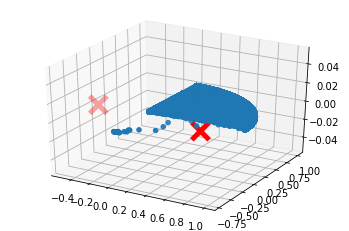

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Mshift_b_X_norm[:,0], Mshift_b_X_norm[:,1], marker='o')
ax.scatter(msb_cluster_centers[:,0], msb_cluster_centers[:,1],  
           marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()


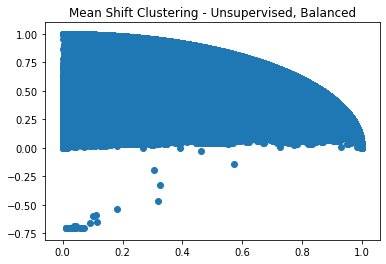

Comparing the assigned categories to the ones in the data:


ValueError: arrays must all be same length

In [64]:
#Plot the solution.
plt.scatter(Mshift_b_X_norm[:,0], Mshift_b_X_norm[:,1])
plt.title('Mean Shift Clustering - Unsupervised, Balanced')
plt.savefig('mean-shift_labeled_balanced.png')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(round(pd.crosstab(ms_b_y_test, mslabels, normalize = 'index'),4))

# Summary and Next Steps

### - Unsupervised learning not a good model for this data set
### - Need to try superviersed learning; perhaps Random Forest

